# Домашнее задание: бинарная классификация отзывов с помощью CNN

Применить CNN для анализа тональности текста (положительный/отрицательный отзыв)

Заполните пропущенный код (`### ВАШ КОД ЗДЕСЬ ###`). **Не меняйте структуру ячеек!** Все ответы и графики должны генерироваться автоматически

**Критерии проверки (максимум 10 баллов):**
*   **2 балла** — корректная загрузка и предобработка данных.
*   **3 балла** — корректно собранная модель по спецификации.
*   **2 балла** — успешное обучение модели (вывод истории обучения).
*   **3 балла** — оценка на тесте и выводы (accuracy > 0.85 даёт +1 балл).

---

## БЛОК 1: Загрузка данных

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/incomplete.W35BT9_1.0.0/imdb_reviews-train.tfrecor…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/incomplete.W35BT9_1.0.0/imdb_reviews-test.tfrecord…

Generating unsupervised examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/incomplete.W35BT9_1.0.0/imdb_reviews-unsupervised.…

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.
Тренировочные данные: 25000 samples
Тестовые данные: 25000 samples


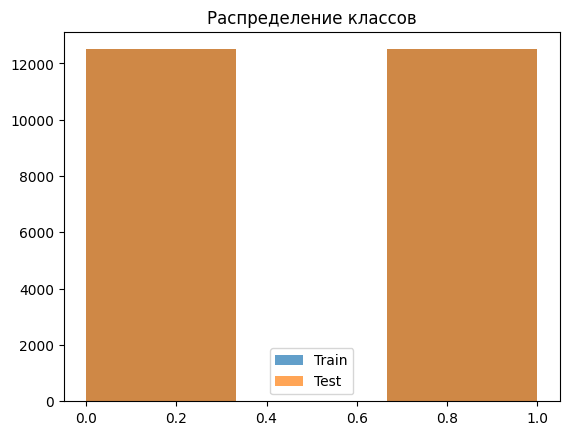

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import tensorflow_datasets as tfds

# 1. Загрузите датасет IMDB Reviews (бинарная классификация)
(ds_train, ds_test), ds_info = tfds.load(
    'imdb_reviews',
    split=['train', 'test'],
    as_supervised=True,
    with_info=True
)

# Преобразуем в numpy массивы
x_train = np.array([example[0].numpy().decode('utf-8')
                    for example in ds_train])
y_train = np.array([example[1].numpy()
                    for example in ds_train])

x_test = np.array([example[0].numpy().decode('utf-8')
                   for example in ds_test])
y_test = np.array([example[1].numpy()
                   for example in ds_test])

print(f"Тренировочные данные: {len(x_train)} samples")
print(f"Тестовые данные: {len(x_test)} samples")

# 2. Визуализируйте распределение классов
plt.hist(y_train, bins=3, alpha=0.7, label='Train')
plt.hist(y_test, bins=3, alpha=0.7, label='Test')
plt.legend()
plt.title('Распределение классов')
plt.show()

## БЛОК 2: Предобработка текста

In [3]:
# 3. Создайте текстовый векторзатор (TextVectorization)
# Ограничьте словарь 10_000 самых частых слов, максимальную длину последовательности — 200 слов
vectorizer = keras.layers.TextVectorization(
    max_tokens=10000,
    output_mode='int',
    output_sequence_length=200
)

# 4. Адаптируйте векторзатор на тренировочных текстах
vectorizer.adapt(x_train)

# 5. Примените векторизацию к данным
x_train_vec = vectorizer(x_train).numpy()
x_test_vec  = vectorizer(x_test).numpy()

print(f"Размерность после векторизации: {x_train_vec.shape}")

Размерность после векторизации: (25000, 200)


## БЛОК 3: Построение модели

In [2]:
# 6. Постройте модель CNN для текста СТРОГО ПО СПЕЦИФИКАЦИИ:
model = keras.Sequential([
    keras.layers.Embedding(
        input_dim=10000,    # размер словаря
        output_dim=128,     # размер embedding
        input_length=200    # длина
    ),
    keras.layers.Conv1D(
        filters=64,
        kernel_size=5,
        activation='relu'
    ),
    keras.layers.GlobalMaxPooling1D(),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d            │ ?                      │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

## БЛОК 4: Обучение

Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 43s 64ms/step - accuracy: 0.6925 - loss: 0.5543 - precision: 0.6951 - recall: 0.5757 - val_accuracy: 0.8568 - val_loss: 0.3258 - val_precision: 0.8372 - val_recall: 0.8902
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 38s 61ms/step - accuracy: 0.9257 - loss: 0.1981 - precision: 0.9230 - recall: 0.9280 - val_accuracy: 0.8630 - val_loss: 0.3390 - val_precision: 0.9073 - val_recall: 0.8123
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 38s 61ms/step - accuracy: 0.9891 - loss: 0.0523 - precision: 0.9907 - recall: 0.9876 - val_accuracy: 0.8704 - val_loss: 0.3849 - val_precision: 0.8623 - val_recall: 0.8854
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 42s 63ms/step - accuracy: 0.9996 - loss: 0.0088 - precision: 0.9995 - recall: 0.9998 - val_accuracy: 0.8734 - val_loss: 0.4480 - val_precision: 0.8722 - val_recall: 0.8787
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 63ms/step - accuracy: 1.0000 - loss: 0.0012 - precision: 1.0000 - recall: 1.0000 - val_accuracy: 0.8730 - val_los

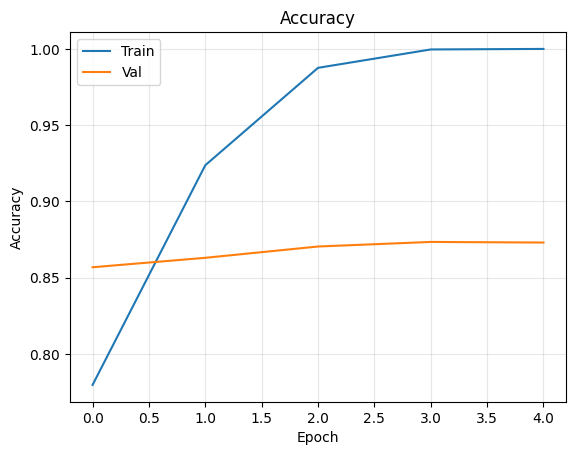

In [5]:
# 7. Скомпилируйте модь с оптимизатором 'adam', функцией потерь 'binary_crossentropy',
#    метриками ['accuracy', 'Precision', 'Recall']
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy', tf.keras.metrics.Precision(name='precision'),
             tf.keras.metrics.Recall(name='recall')]
)

# 8. Обучите модель на 5 эпох с validation_split=0.2, batch_size=32
history = model.fit(
    x_train_vec,
    y_train,
    epochs=5,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

# 9. Постройте график точности (accuracy) на обучении и валидации
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Val')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## БЛОК 5: Оценка

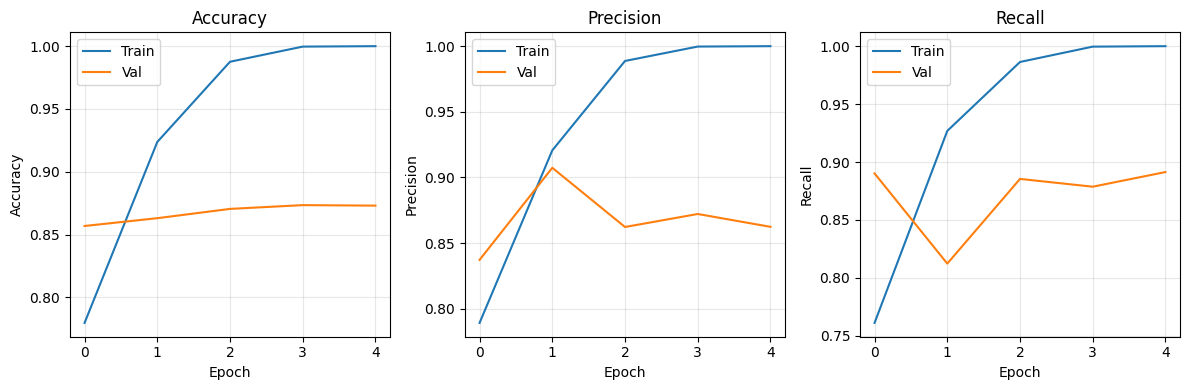


Финальные метрики на валидации:
val_accuracy:  0.8730
val_precision: 0.8624
val_recall:    0.8913
val_f1_score:   0.8766


In [6]:
# Дополнительные графики: Accuracy, Precision, Recall
plt.figure(figsize=(12, 4))

# Accuracy
plt.subplot(1, 3, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Val')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True, alpha=0.3)

# Precision
plt.subplot(1, 3, 2)
plt.plot(history.history['precision'], label='Train')
plt.plot(history.history['val_precision'], label='Val')
plt.title('Precision')
plt.xlabel('Epoch')
plt.ylabel('Precision')
plt.legend()
plt.grid(True, alpha=0.3)

# Recall
plt.subplot(1, 3, 3)
plt.plot(history.history['recall'], label='Train')
plt.plot(history.history['val_recall'], label='Val')
plt.title('Recall')
plt.xlabel('Epoch')
plt.ylabel('Recall')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Итоговые значения после 5 эпох
print("\nФинальные метрики на валидации:")
print(f"val_accuracy:  {history.history['val_accuracy'][-1]:.4f}")
print(f"val_precision: {history.history['val_precision'][-1]:.4f}")
print(f"val_recall:    {history.history['val_recall'][-1]:.4f}")

# Дополнительно можно вывести F1-меру (гармоническое среднее precision и recall)
precision = history.history['val_precision'][-1]
recall = history.history['val_recall'][-1]
f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
print(f"val_f1_score:   {f1:.4f}")

## БЛОК 6: Выводы

**Ответьте на вопросы в этой ячейке (текстом):**

1.  Какая итоговая точность (accuracy) на тесте?
2.  Что показывает разница между точностью на обучении и валидации? Есть ли переобучение?
3.  Какой из 10 показанных отзывов был классифицирован неверно? Почему, на ваш взгляд?

**Мои ответы:**
1.  0.8730
2.  Переобучение есть, это показывает большая разница между метриками на графике ( модель уже итак запомнила все)
3.  не понял вопрос, эпох 5 графиков 3 ??????